In [ ]:
from google.colab import drive
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Đọc và tiền sử lý dữ liệu


In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
WORK_PATH = './drive/MyDrive/Colab Notebooks/data/test'
DATA_PATH = './drive/MyDrive/Colab Notebooks/data/train'

In [ ]:
ImageGen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,rotation_range=20,
                                                        width_shift_range=0.1,
                                                        height_shift_range=0.1,validation_split=0.2)

images_train = ImageGen.flow_from_directory(DATA_PATH,target_size=(224, 224),subset='training',batch_size = 100)
images_val = ImageGen.flow_from_directory(DATA_PATH,target_size=(224, 224),subset='validation',batch_size = 100)
images_test = ImageGen.flow_from_directory(WORK_PATH,target_size=(224, 224),batch_size = 813)

Found 4421 images belonging to 14 classes.
Found 1100 images belonging to 14 classes.
Found 1283 images belonging to 14 classes.


In [ ]:
class_indices = list(images_train.class_indices.values())
class_names = list(images_train.class_indices.keys())
class_indices, class_names

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 ['Audi',
  'Ducati',
  'Hyundai Creta',
  'Mahindra Scorpio',
  'Piaggio',
  'Rolls Royce',
  'SYM',
  'Suzuki',
  'Swift',
  'Tata Safari',
  'Toyota Innova',
  'Triumph',
  'Wave',
  'Yamaha'])

## Xây dựng mô hình

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(input_shape = (224,224,3), weights="imagenet",include_top=False)
inputs = keras.layers.Input((224,224,3),name = 'input')
x = keras.layers.Resizing(224,224, name = 'resize')(inputs)
x = pretrained_model(x)
x = keras.layers.GlobalAveragePooling2D(name = 'pooling')(x)
ouputs = keras.layers.Dense(14,activation = 'softmax',name = 'classfication')(x)
model = keras.Model(inputs = inputs, outputs = ouputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 resize (Resizing)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 pooling (GlobalAveragePooli  (None, 2048)             0         
 ng2D)                                                           
                                                                 
 classfication (Dense)       (None, 14)                28686     
                                                                 
Total params: 23,616,398
Trainable params: 23,563,278
Non-trainable params: 53,120
__________________________________________

In [ ]:
l = len(model.layers[2].layers)
for i, layer in enumerate(model.layers[2].layers):
  if i <= 0.7*l:
    layer.trainable = False
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 resize (Resizing)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 pooling (GlobalAveragePooli  (None, 2048)             0         
 ng2D)                                                           
                                                                 
 classfication (Dense)       (None, 14)                28686     
                                                                 
Total params: 23,616,398
Trainable params: 17,242,126
Non-trainable params: 6,374,272
_______________________________________

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0005,
                                                amsgrad=True),
              loss = keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
callbacks = keras.callbacks.EarlyStopping(monitor="val_accuracy",patience  = 5,verbose=1,min_delta = 0.01,restore_best_weights=True)
history = model.fit(images_train,validation_data = images_val ,epochs = 100,callbacks = callbacks)

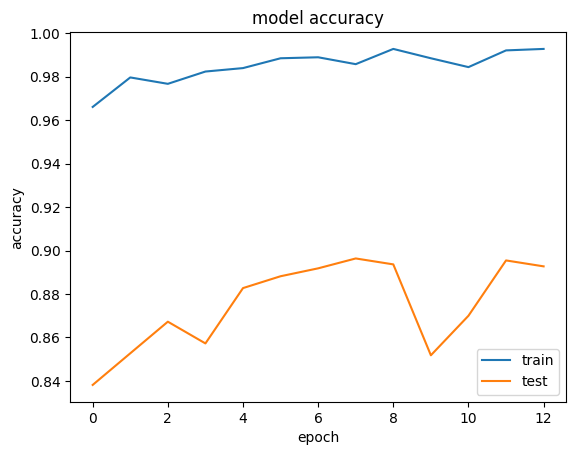

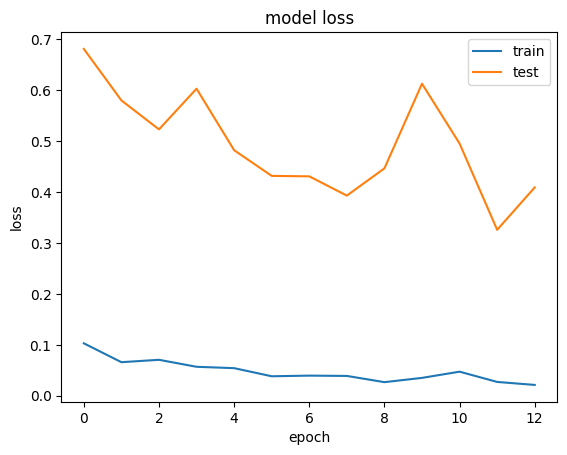

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(images_train)

45/45 [==============================] - 69s 2s/step - loss: 0.0403 - accuracy: 0.9871


[0.04027608409523964, 0.98710697889328]

In [ ]:
model.evaluate(images_val)

11/11 [==============================] - 17s 2s/step - loss: 0.4106 - accuracy: 0.8909


[0.4106258749961853, 0.8909090757369995]

In [ ]:
model.evaluate(images_test)

2/2 [==============================] - 22s 7s/step - loss: 0.4287 - accuracy: 0.8885


[0.42873725295066833, 0.8885424733161926]

In [ ]:
img, label = images_test.next()

In [ ]:
y_pred = np.argmax(model.predict(img),axis =-1)
y_true = np.argmax(label,axis =-1)
print(np.argmax(label,axis =-1))

26/26 [==============================] - 3s 93ms/step
[ 5  0 12  5  3 13  4  0  9 12 10 12  0  0  2  0  2  5 10 11  3  0 10  4
 10  8 10  2  3  8  1  7 10  1 10  1 10  4 11  5 13  2 10  0  3  4  2 11
  5 11  0  0  8 13 10  5 12 13  0 13  1 10  3  1  5  2  9  0  8  0  1 11
  8  9 10  4  7  4 13  8 10  6  3  2  9 13  0 10  2  4  9  8  2 12 13  3
  9  4 13  0 11  8 10 12  9 10  8  3  3  0 10  6  1  0  5  5 13  5  4  3
 11 10 10  8 13 12  5  2  3  8 10  0  4  9  1  1 10  3 10 10  8  1 10  6
 12  4  0  9 10  5  3 12  8  4  9 10 11 10  1  9 10  8  0  6  3  3 13 11
 10  5  5  0  9 10  5  7  2 10 10  3  0 12 13 13  4 12  4  2  8 12  8  2
 13  2  9  9  0  8  0 13 11  5  8  0  0 10 11  3  3 13  9 10  0  3  5  7
 10  8  4  3  1 13  0  2  0 10 12 10  0  0  8  8  7  0  0 10 11  1 12  0
 10  4  1  8  0  9  6  6  7  5  7  6  0 13 13 13  1  9 12  0  8  5 11  4
  8 10 10  2  2  4 11  8  7  4  0  3 10  9 10  8  6 11  0  6  7  4  2 10
  2  3  8  3 10 10 13 10  6 11  7 12  6  1  2  9  3 13  1  8 12  0  8 

In [ ]:
metrics_acc  = tf.keras.metrics.Accuracy()
metrics_acc.update_state(y_true,y_pred)
metrics_acc.result().numpy()

0.8892989

In [ ]:
print(classification_report(y_true,y_pred,target_names=class_names))

                  precision    recall  f1-score   support

            Audi       0.99      0.92      0.96       116
          Ducati       0.81      0.92      0.86        48
   Hyundai Creta       0.93      0.91      0.92        45
Mahindra Scorpio       0.93      0.98      0.95        53
         Piaggio       0.96      0.57      0.71        46
     Rolls Royce       0.98      0.98      0.98        46
             SYM       0.61      0.57      0.59        40
          Suzuki       0.90      0.90      0.90        29
           Swift       0.92      0.91      0.91        75
     Tata Safari       0.98      1.00      0.99        64
   Toyota Innova       0.95      0.97      0.96       120
         Triumph       0.86      0.82      0.84        45
            Wave       0.78      0.97      0.86        32
          Yamaha       0.64      0.78      0.70        54

        accuracy                           0.89       813
       macro avg       0.87      0.87      0.87       813
    weighted

In [ ]:
confusion_matrix(y_true,y_pred)

array([[108,   0,   1,   0,   1,   4,   0,   0,   0,   1,   0,   0,   0,
          1],
       [  0,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   0,
          1],
       [  1,   0,  41,   1,   0,   0,   0,   0,   1,   1,   0,   0,   0,
          0],
       [  0,   0,   1,  51,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0],
       [  0,   3,   0,   0,  32,   0,   2,   0,   0,   0,   0,   1,   0,
          8],
       [  2,   0,   0,   0,   0,  43,   0,   0,   0,   0,   0,   1,   0,
          0],
       [  0,   0,   0,   0,   2,   0,  16,   0,   0,   0,   0,   4,   2,
         16],
       [  0,   0,   0,   0,   0,   0,   0,  29,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   1,   0,   0,   0,  71,   0,   1,   0,   0,
          1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  63,   1,   0,   0,
          0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   3,   1, 114,   1,   0,
          0],
       [  0,   2,   0,   0,   0,   0,   0, 

## Lưu mô hình

In [ ]:
SAVE_PATH='./drive/MyDrive/Colab Notebooks/data/answer'


In [ ]:
model.save_weights(os.path.join(SAVE_PATH,'Model_xe2.h5'))

# Sử dụng mô hình


In [ ]:
model = None
pretrained_model = tf.keras.applications.ResNet50(input_shape = (224,224,3), weights="imagenet",include_top=False)
inputs = keras.layers.Input((224,224,3),name = 'input')
x = keras.layers.Resizing(224,224, name = 'resize')(inputs)
x = pretrained_model(x)
x = keras.layers.GlobalAveragePooling2D(name = 'pooling')(x)
ouputs = keras.layers.Dense(14,activation = 'softmax',name = 'classfication')(x)
model = keras.Model(inputs = inputs, outputs = ouputs)




94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
l = len(model.layers[2].layers)
for i, layer in enumerate(model.layers[2].layers):
  if i <= 0.7*l:
    layer.trainable = False

In [ ]:
model.load_weights(os.path.join(SAVE_PATH,'Model_xe2.h5'))

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(14)}

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=14)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 181ms/step


In [ ]:
labels = ['Audi',
  'Hyundai Creta',
  'Mahindra Scorpio',
  'Rolls Royce',
  'Swift',
  'Tata Safari',
  'Toyota Innova']

In [ ]:
i=1
pred = model.predict(img[i].reshape(1,224,224,3))
pred = np.argmax(pred,axis = -1)

In [ ]:
labels[pred[0]]

'Toyota Innova'

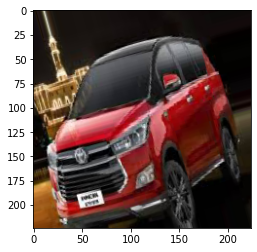

In [ ]:
plt.imshow(img[i]/255)


In [ ]:
print(label[i])

[0. 0. 0. 0. 0. 0. 1.]


## Xem lại kết quả mô huấn luyện


In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001,
                                                amsgrad=True),
              loss = keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.evaluate(images_train)

27/27 [==============================] - 37s 1s/step - loss: 0.0142 - accuracy: 0.9959


[0.01416922640055418, 0.9959016442298889]

In [ ]:
model.evaluate(images_val)

7/7 [==============================] - 9s 1s/step - loss: 0.1489 - accuracy: 0.9596


[0.14886237680912018, 0.9595808386802673]

In [ ]:
model.evaluate(images_test)

1/1 [==============================] - 13s 13s/step - loss: 0.1768 - accuracy: 0.9533


[0.1767687350511551, 0.9532595276832581]